# Project: Predictive Credit Scoring (Credit Card Default)

## Project Goal
This notebook uses a real-world dataset of 30,000 credit card clients to build a model that predicts the probability of a client defaulting on their next payment.

---

## Part 1: Foundational Analysis (BI & EDA)
We'll explore the data to find the key characteristics of clients who default.

---

## Part 2: The Advanced Feature (Machine Learning Model)
We will build a predictive model to automate risk assessment.

## Part 0: Setup and Data Cleaning 🧹
Our first step is to prepare the environment. We'll import the necessary libraries. 
Then, we'll perform crucial cleaning steps to make the data ready for analysis.

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set_style("whitegrid")
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Define the local file path
file_path = 'data/default of credit card clients.xls'

# Load the data from the local .xls file
# NOTE: The first row is a header, so we skip it using header=1.
try:
    df = pd.read_excel(file_path, header=1)
except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'")
    print("Please make sure the 'data' folder and the Excel file exist and the names are correct.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure you have 'openpyxl' installed: pip install openpyxl")
    print("Please ensure you have 'xlrd' installed: pip install xlrd")

# Rename columns to be more Python-friendly
if 'df' in locals():
    df.rename(columns={
        'default payment next month': 'default_payment_next_month',
        'PAY_0': 'PAY_1' # Renaming for consistency
    }, inplace=True)

    # Drop the ID column as it's not a predictive feature
    df.drop('ID', axis=1, inplace=True)

    print("Data loaded and columns renamed successfully!")
    display(df.head())

Data loaded and columns renamed successfully!


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Part 1: Exploratory Data Analysis (EDA) 📊
With our data clean and structured, we can now dive into the analysis. The goal is to find the key patterns and characteristics that distinguish between clients who repay their loans and those who default.

---
### Step 1.1: Understanding the Target Variable
What percentage of clients in the dataset defaulted?

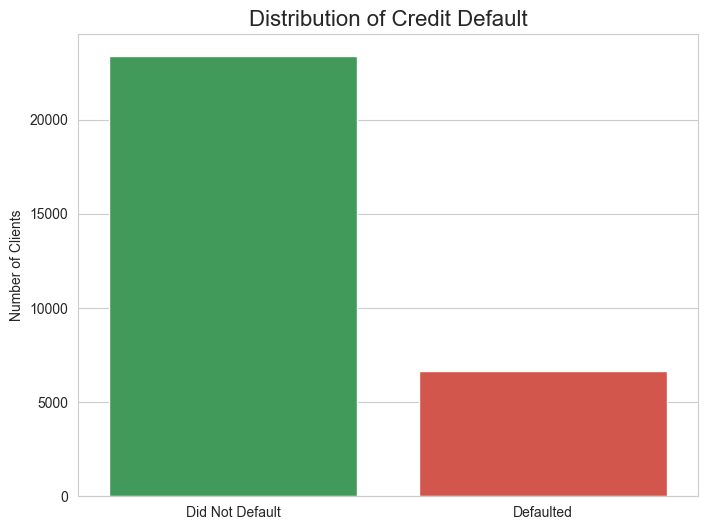

default_payment_next_month
0    77.88
1    22.12
Name: proportion, dtype: float64


In [4]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(
    x='default_payment_next_month',
    data=df, hue='default_payment_next_month',
    palette=['#34A853', '#EA4335'],
    legend=False
)
plt.title('Distribution of Credit Default', fontsize=16)
plt.xticks([0, 1], ['Did Not Default', 'Defaulted'])
plt.ylabel('Number of Clients')
plt.xlabel('')
plt.show()

# Print the percentage
print(df['default_payment_next_month'].value_counts(normalize=True) * 100)

We can see that **22%** of the applicants in this dataset defaulted on their loans, while **78%** were good credit risks. This is a moderately imbalanced dataset, but not extreme.

---
### Step 1.2: Bivariate Analysis - Finding Risk Factors
Now for the core of our analysis: exploring how different borrower attributes relate to the probability of default.

---
#### How does Credit Limit relate to Default?

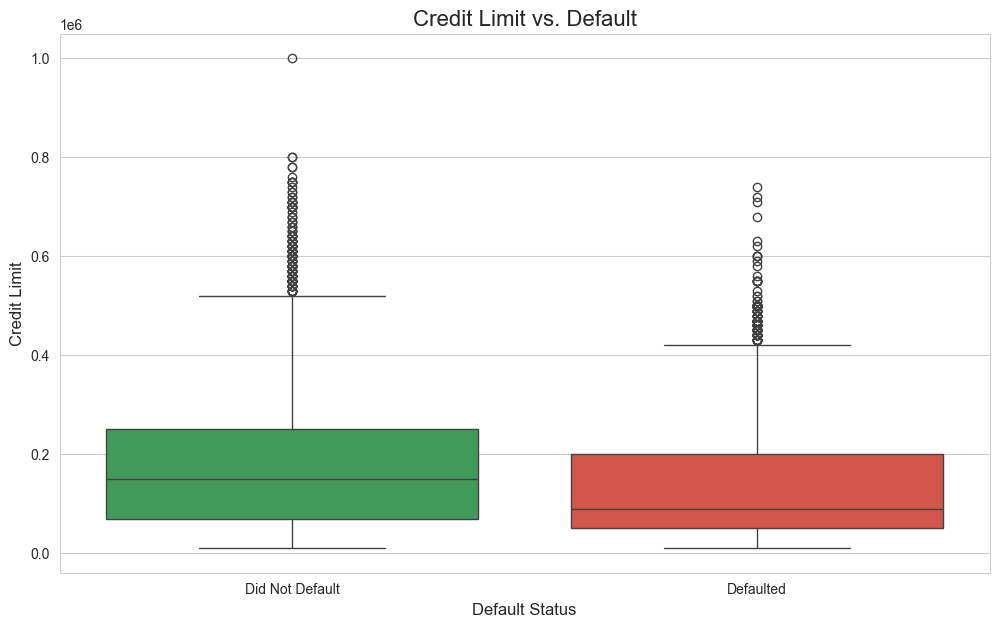

In [5]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    x='default_payment_next_month',
    y='LIMIT_BAL',
    data=df,
    palette=['#34A853', '#EA4335'],
    hue='default_payment_next_month',
    dodge=False
)
plt.title('Credit Limit vs. Default', fontsize=16)
plt.xticks([0, 1], ['Did Not Default', 'Defaulted'])
plt.xlabel('Default Status', fontsize=12)
plt.ylabel('Credit Limit', fontsize=12)
plt.legend([],[], frameon=False) # Hide the redundant legend
plt.show()

#### Clients who defaulted tend to have a lower median credit limit.

---
### Does recent Payment History predict Default?
The PAY_1 column shows the payment status from the most recent month. A higher number means a longer delay.

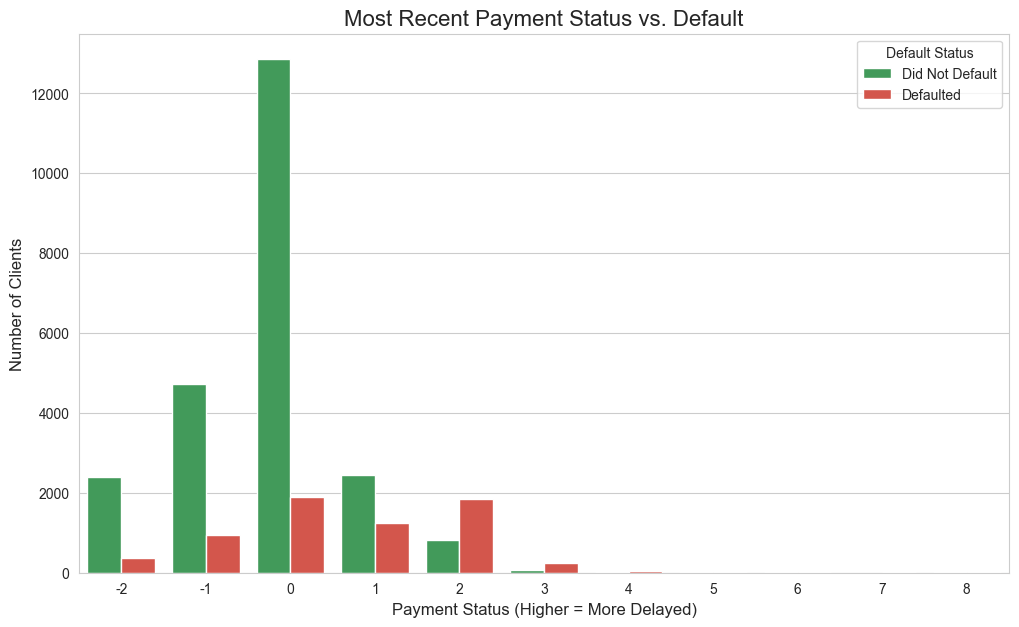

In [6]:
plt.figure(figsize=(12, 7))
sns.countplot(x='PAY_1', hue='default_payment_next_month', data=df, palette=['#34A853', '#EA4335'])
plt.title('Most Recent Payment Status vs. Default', fontsize=16)
plt.xlabel('Payment Status (Higher = More Delayed)', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Default Status', labels=['Did Not Default', 'Defaulted'])
plt.show()

#### This is a very strong indicator. The proportion of defaults increases dramatically as the payment delay gets longer.

---

### **Step 1.3: Key Business Insights 💡**

Based on our exploratory analysis of the 30,000 clients, we can provide the following actionable insights to the business:

* **Insight 1: Recent Payment History is the Strongest Red Flag.**
    The `PAY_1` chart shows an undeniable trend: the longer a client's payment was delayed in the most recent month, the exponentially higher their chance of defaulting. A client who was on time (`PAY_1` = 0) rarely defaulted, while a client with a two-month delay (`PAY_1` = 2) had a very high rate of default. **This is the most powerful single predictor** we've seen and should be heavily weighted in any risk assessment.

* **Insight 2: Lower Credit Limits Correlate with Higher Risk.**
    The box plot for `LIMIT_BAL` (Credit Limit) clearly shows that the median credit limit for clients who defaulted is significantly lower than for those who did not. This suggests that the bank's existing credit allocation may already be identifying riskier clients by assigning them lower limits. It confirms that **credit limit is a key variable** in assessing risk.

* **Insight 3: Default is a Significant Business Problem.**
    With a **22% default rate**, nearly one in five clients in this dataset failed to make their next payment. This is not a rare event. This high rate underscores the financial necessity of building an accurate, automated model to predict and mitigate this risk before extending credit.


---

## Part 2: Machine Learning Model 🤖
Now we'll build our predictive models using this new, larger dataset.

### Step 2.1: Feature Preparation & Scaling

In [7]:
# import libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc

# Separate features (X) and target (y)
X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale the data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data prepared for modeling successfully.")

Data prepared for modeling successfully.


### Step 2.2: Model Training


In [8]:
# --- Model 1: Logistic Regression (Baseline on Scaled Data) ---
print("Training Logistic Regression model...")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("Logistic Regression training complete.")

# --- Model 2: LightGBM (Advanced on Original Data) ---
# Tree models like LightGBM do not require feature scaling.
print("\nTraining LightGBM model...")
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
print("LightGBM training complete.")

Training Logistic Regression model...
Logistic Regression training complete.

Training LightGBM model...
[LightGBM] [Info] Number of positive: 4977, number of negative: 17523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 22500, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
LightGBM training complete.


### Step 2.3: Model Evaluation

### Confusion Matrix

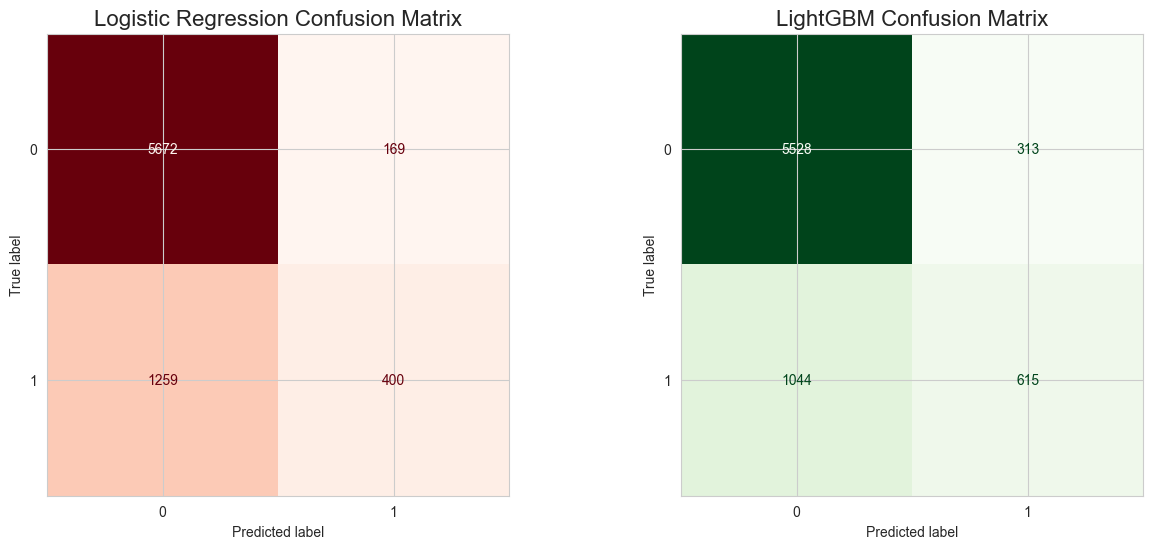

In [9]:
# Create predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_lgbm = lgbm.predict(X_test)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_log_reg,
    ax=axes[0],
    colorbar=False,
    cmap='Reds'
)
axes[0].set_title('Logistic Regression Confusion Matrix', fontsize=16)
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lgbm,
    ax=axes[1],
    colorbar=False,
    cmap='Greens')
axes[1].set_title('LightGBM Confusion Matrix', fontsize=16)
plt.show()

### Classification Report (Precision vs Recall)

In [10]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))

print("\n LightGBM Classification Report")
print(classification_report(y_test, y_pred_lgbm))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.70      0.24      0.36      1659

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500


 LightGBM Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.66      0.37      0.48      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



#### The LightGBM model shows a much better Recall for the 'Defaulted' class (1), 
meaning it's better at catching clients who are likely to default.

## AUC - ROC Curve

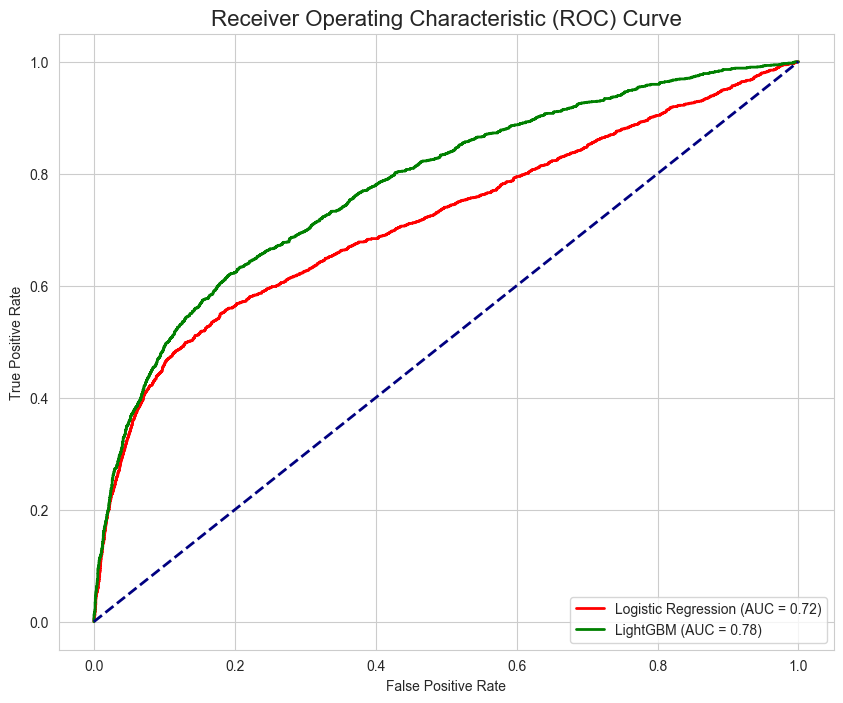

In [12]:
# Get prediction probabilities
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]

# Calculate ROC curve data
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log = auc(fpr_log, tpr_log)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, color='green', lw=2, label=f'LightGBM (AUC = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### The *LightGBM model (AUC = 0.78)* is the clear winner. It is significantly better at distinguishing between clients who will default and those who will not. Its higher recall for the default class is crucial for a lending business, as it is more effective at flagging high-risk applicants.

This model can now be used to generate a risk score for every new credit card applicant, enabling the business to automate approvals, flag medium-risk clients for manual review, and reduce financial losses from defaults.